## Figure 1 Code to Produce Figures

This figure will focus on the presentation of Discrete vs Continuous.

In [48]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels.api as sm
plt.rcParams.update({'font.size': 13})
plt.rcParams["figure.figsize"] = (10,10)

In [6]:
###################### Load in Calcium Fluoresence Data ######################
session13_fluorescence = np.load("../../sessionM409828_13_CALCIUM-FLUORESCENCE.npy")

### Create Pandas data frame of the data
ns = [f"n{i}" for i in range(session13_fluorescence[0,:].shape[0])]
session13_fluorescence_df = pd.DataFrame(session13_fluorescence, columns = ns)
session13_fluorescence_df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2698,n2699,n2700,n2701,n2702,n2703,n2704,n2705,n2706,n2707
0,386.614746,356.042969,364.569641,411.091553,307.887634,258.511169,321.968903,181.205994,265.892914,280.296112,...,274.629486,350.200104,283.980774,345.541870,244.838470,274.587616,292.187408,362.794220,309.516724,318.196716
1,394.779144,321.291138,300.326233,364.549255,365.808014,276.043915,443.065826,276.137421,284.962494,311.085419,...,237.430527,300.656067,371.085419,369.188751,297.386108,266.207123,252.236877,384.805908,253.801224,309.436493
2,430.134644,356.892334,316.089752,369.321747,357.231720,268.536591,380.504395,237.075073,292.391113,303.730865,...,234.579224,233.114975,375.837341,309.508606,319.197876,264.221771,299.052185,421.659119,268.491364,308.236237
3,492.495636,435.140076,328.820099,450.870300,322.758728,283.486267,456.826660,240.693878,298.278900,312.732330,...,312.513519,288.417877,375.175171,298.330444,295.929596,281.991943,291.278473,378.071320,384.879822,342.556366
4,419.968262,367.274200,324.190277,457.118439,391.038940,298.655029,425.800476,229.693817,371.756531,293.526672,...,258.952301,349.974335,346.097595,366.578918,297.467255,328.501526,309.428894,408.260315,347.325104,331.188110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,312.012756,361.765015,292.936798,479.136536,364.582458,348.525269,432.958282,265.899567,364.285889,276.832275,...,265.440521,327.389404,314.704071,284.906982,287.028564,280.412109,305.130524,442.109039,266.693573,285.021912
21612,412.542938,353.919128,323.288300,348.898071,383.361847,344.100220,437.041687,193.464905,314.954651,297.092010,...,258.959564,406.966003,341.093964,357.600220,352.963226,278.937195,294.812195,447.871368,294.682220,292.638519
21613,372.910217,388.861816,337.440063,453.535980,350.960876,268.740021,372.935608,239.881393,377.214508,268.052277,...,270.972809,270.036163,298.712524,378.840210,286.396790,301.706818,279.817627,359.911774,317.252136,257.778015
21614,328.085480,415.220123,292.897522,428.899628,355.838837,375.188202,457.023590,239.636383,302.490509,297.914673,...,266.925446,329.060760,306.616821,377.095612,253.035202,261.195953,280.266388,365.129639,325.545532,349.931305


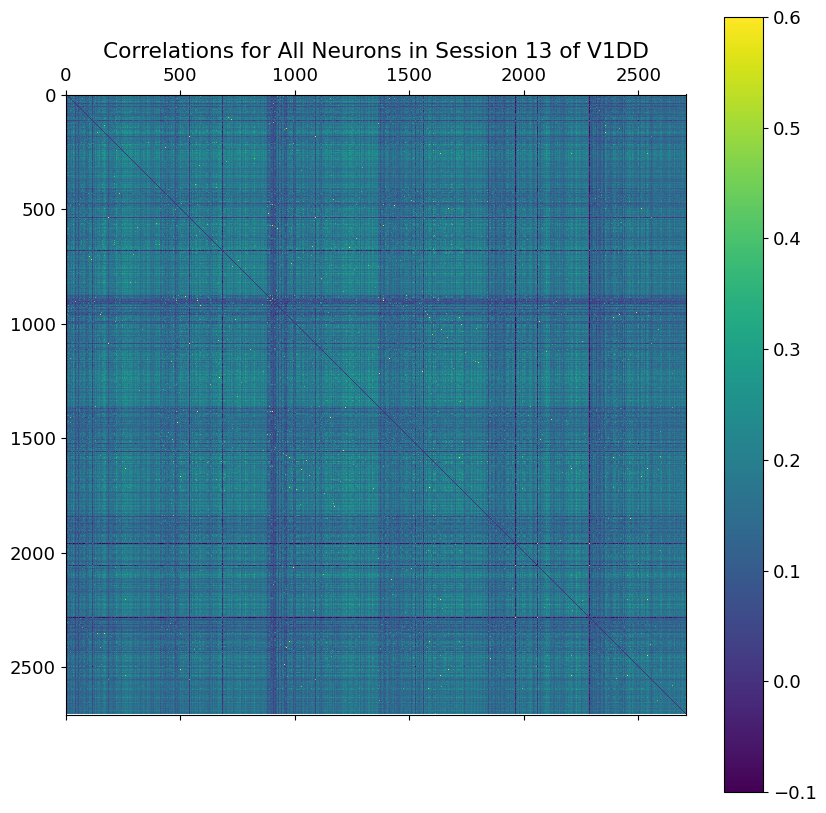

In [49]:
### Produce Correlation Matrix for Session 13 Data
corr_matrix = pd.DataFrame(np.corrcoef(session13_fluorescence_df.values, rowvar=False), columns=session13_fluorescence_df.columns)
np.fill_diagonal(corr_matrix.values, 0) # Set All Self Correlations to 0
plt.matshow(corr_matrix)
plt.title('Correlations for All Neurons in Session 13 of V1DD')
plt.clim(-0.1, 0.6)
plt.colorbar()
plt.savefig('Correlation_Matrix.png')
plt.show()

### Hierarchical Clustering

To first compare discrete vs. continuous, we sought to exemplify clustering of neuronal data using Hierarchical Clustering

Notes From Before that are worth it to check out:
- Might be important to apply the Cophonetic Correlation to compare this dendrogram across different linkages. See if 'ward' is actually the best representation. Hard to tell with neuronal data
- As for the distances, right now we're using something simple for the dissimilarity being the inverse of the correlation. however, it might be helpful afterwards to check how this clustering does when we use the geodesic distance of the Isomap for those dissimilarities

/tmp/ipykernel_1355513/280794888.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = abs(linkage(dissimilarity, 'ward'))


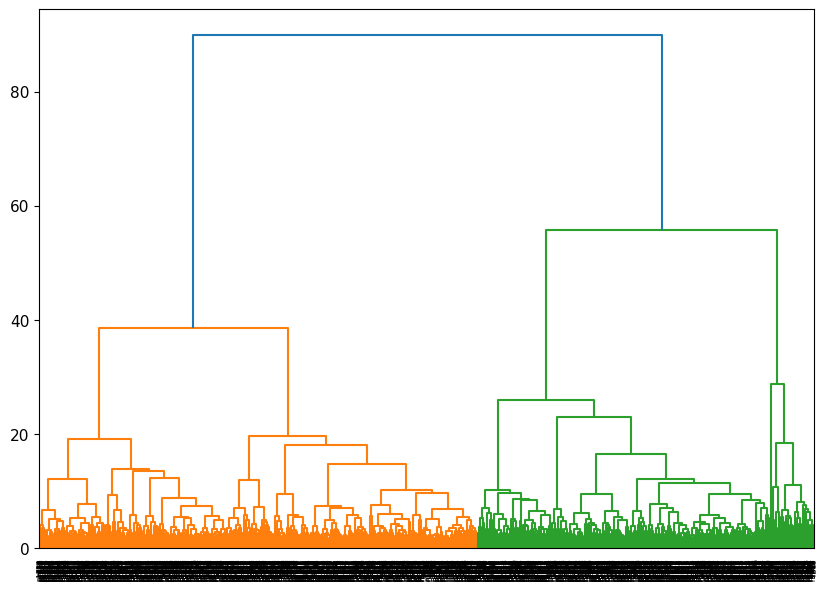

In [21]:
### Run Hierarchical Clustering Algorithm on data
plt.figure(figsize=(10,7))
corr = pd.DataFrame(np.corrcoef(session13_fluorescence_df.values, rowvar=False), columns= session13_fluorescence_df.columns)
dissimilarity = 1 - corr
# ‘complete’ linkage uses the maximum distances between all observations of the two sets
Z = abs(linkage(dissimilarity, 'ward'))

dendrogram(Z, labels= session13_fluorescence_df.columns, orientation='top', leaf_rotation=90);

In [22]:
original_dists = dissimilarity.values  # Original Disimilarity between Neurons
cophenetic_dists = squareform(cophenet(Z)) # Cophenetic Distances Between Neurons
corr_coef = np.corrcoef(original_dists, cophenetic_dists)[0,1]
corr_coef

0.9311424270543737

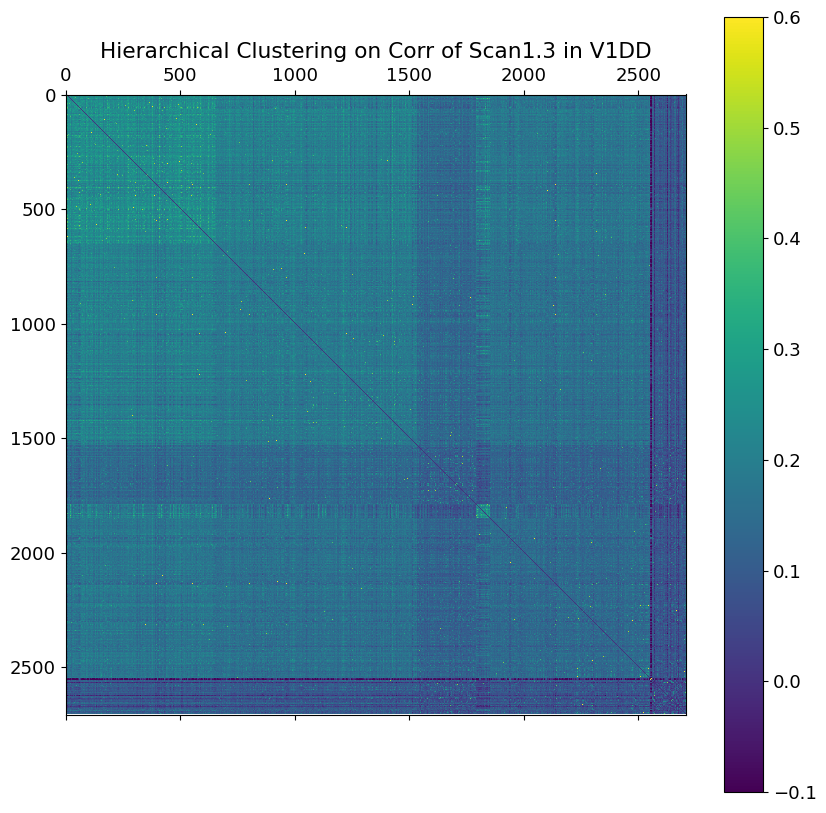

In [50]:
# Clusterize the data
threshold = 20 # Threshold of 13 produces 15 distinct clusters
labels_corr = fcluster(Z, threshold, criterion='distance') # Show the unique clusters: np.unique(labels_corr)

labels_corr_order = np.argsort(labels_corr) # Keep the indices to sort labels

# Build a new dataframe based on the sorted columns
clustered_corr = [session13_fluorescence[:,i] for i in labels_corr_order]
clustered_corr = pd.DataFrame(np.array(clustered_corr).T)
        
corr_matrix = pd.DataFrame(np.corrcoef(clustered_corr.values, rowvar=False), columns= clustered_corr.columns)
np.fill_diagonal(corr_matrix.values, 0) # Set All Self Correlations to 0     
plt.matshow(corr_matrix)
plt.title("Hierarchical Clustering on Corr of Scan1.3 in V1DD")
plt.clim(-0.1, 0.6)
plt.savefig('Hierarchical_Clustering.png')
plt.colorbar()

### Continuing with Isomap

In [52]:
# open a file, where you stored the pickled data
with open("../../manifold_2D_on_corr_V1DD_Session_13_fluorescence.pickle", 'rb') as f:
    # dump information to that file
    manifold_2D_on_corr_V1DD_Session_13 = pickle.load(f)

manifold_2D_on_corr_V1DD_Session_13

,Component 1,Component 2
0,-0.302677,-0.457820
1,1.193673,-0.251246
2,5.388948,0.030184
3,2.155304,-0.215100
4,2.254268,-0.727503
...,...,...
2703,0.449029,-0.009702
2704,-0.333693,-1.035841
2705,-2.118944,-0.202800
2706,0.226652,0.097034


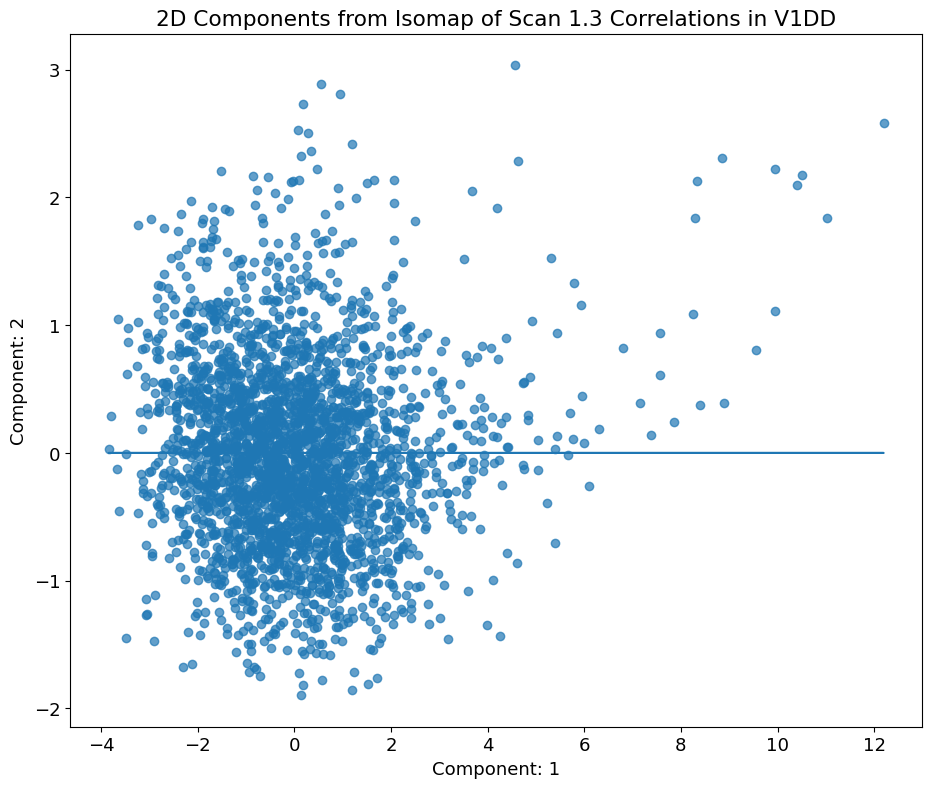

In [54]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(11,9)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Scan 1.3 Correlations in V1DD')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 2D components plot
ax.scatter(manifold_2D_on_corr_V1DD_Session_13['Component 1'], manifold_2D_on_corr_V1DD_Session_13['Component 2'], marker='o',alpha=0.7)
#fig.colorbar(mapper, orientation='vertical')

m, b = np.polyfit(manifold_2D_on_corr_V1DD_Session_13['Component 1'], manifold_2D_on_corr_V1DD_Session_13['Component 2'], 1)
plt.plot(manifold_2D_on_corr_V1DD_Session_13['Component 1'], m * manifold_2D_on_corr_V1DD_Session_13['Component 1'] + b)
plt.savefig("Isomap_Plot.png")
plt.show()

In [55]:
# open a file, where you stored the pickled data
with open("../../plotted_corr_fluorescence_vs_isomap_V1DD_session_13.pickle", 'rb') as f:
    # dump information to that file
    plotted_corr_fluorescence_vs_isomap_V1DD_session_13 = pickle.load(f)

plotted_corr_fluorescence_vs_isomap_V1DD_session_13

array([[1.51054193e+00, 6.32402581e-01, 0.00000000e+00, 1.00000000e+00],
       [5.71250697e+00, 1.69883685e-02, 0.00000000e+00, 2.00000000e+00],
       [2.46993587e+00, 1.90934089e-01, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.36468211e+00, 2.10974136e-01, 2.70500000e+03, 2.70600000e+03],
       [9.47429809e-01, 2.55747485e-01, 2.70500000e+03, 2.70700000e+03],
       [2.09344527e+00, 1.99785215e-01, 2.70600000e+03, 2.70700000e+03]])

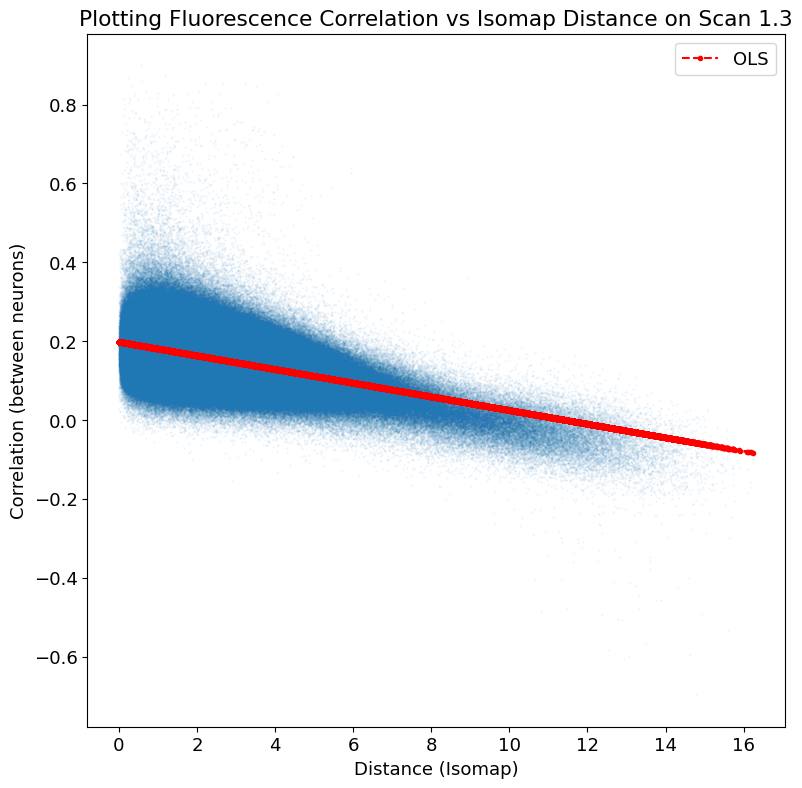

In [56]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Plotting Fluorescence Correlation vs Isomap Distance on Scan 1.3')
ax.set_xlabel('Distance (Isomap)')
ax.set_ylabel('Correlation (between neurons)')
matplotlib.rcParams['agg.path.chunksize'] = 100000

# Show 2D components plot
step = plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0].shape[0] // 3000000 # sample 3000000 sampled points
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,1][sample]
ax.scatter(curr_sample_X, curr_sample_Y , marker='o',alpha=0.05, s = 0.5)

# Fit a linear regression
# Fit a linear regression
X_input = sm.add_constant(plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0])
res = sm.OLS(plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,1], X_input).fit()
ax.plot(plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0], res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.savefig("Corr_vs_Isomap")
plt.show()